 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

In [1]:
library(Seurat)

Loading required package: ggplot2
Loading required package: cowplot

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: Matrix


In [2]:
ctrl.data <- read.table("~/_Seurat/dataset1.txt", 
    sep = "\t")

In [3]:
head(ctrl.data)

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): длина 'fmt' превышает максимальную длину формата 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_latex.data.frame(obj)
9. repr_matrix_generic(obj, sprintf("\\begin{tabular}{%s}\n%%s%%s\\end{tabular}\n", 
 .     cols), "%s\\\\\n\\hline\n", "  &", " %s &", "%s", "\t%s\\\\\n", 
 .     "%s &", " %s &", escape_fun = latex_escape_vec, ...)
10. sp

,W29953,W29954,W29955,W29956,W29957,W29958,W29959,W29960,W29961,W29962,⋯,W76327,W76328,W76329,W76330,W76331,W76332,W76333,W76334,W76335,W76336
ENSMUSG00000000171,0,2,0,0,1,3,0,1,3,0,⋯,0,0,0,0,2,2,1,0,0,0
ENSMUSG00000000290,0,0,0,1,0,0,0,0,1,1,⋯,1,0,0,0,0,0,0,0,0,0
ENSMUSG00000000594,0,0,0,2,0,2,0,0,0,0,⋯,0,0,0,0,5,0,0,0,0,0
ENSMUSG00000001082,0,1,0,0,1,0,0,0,0,2,⋯,0,0,0,0,0,1,0,0,0,0
ENSMUSG00000001380,0,0,0,0,0,0,0,2,0,1,⋯,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000001750,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [10]:
stim.data <- read.table("~/_Seurat/dataset2_test.txt", 
    sep = "\t")

In [11]:
head(stim.data)

,Prog_007,Prog_013,Prog_019,Prog_025,Prog_031,Prog_037,Prog_001,Prog_008,Prog_014,Prog_020,⋯,Prog_851,Prog_809,Prog_816,Prog_822,Prog_828,Prog_834,Prog_840,Prog_846,Prog_852,Prog_810
ENSMUSG00000000001,239,568,234,95,2,4,22,22,97,69,⋯,43,1652,182,500,516,137,267,317,85,676
ENSMUSG00000000003,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000000028,72,3,20,48,1,0,2,2443,210,4,⋯,5,4,50,401,293,5,596,649,102,457
ENSMUSG00000000031,0,1,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000000037,0,0,0,42,0,0,0,0,16,1,⋯,3,1,0,0,0,0,0,0,1,134
ENSMUSG00000000049,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [12]:
# Set up control object
ctrl <- CreateSeuratObject(raw.data = ctrl.data, project = "IMMUNE_CTRL", min.cells = 5)
ctrl@meta.data$stim <- "CTRL"
ctrl <- FilterCells(ctrl, subset.names = "nGene", low.thresholds = 500, high.thresholds = Inf)
ctrl <- NormalizeData(ctrl)
ctrl <- ScaleData(ctrl, display.progress = F)

In [13]:
# Set up stimulated object
stim <- CreateSeuratObject(raw.data = stim.data, project = "IMMUNE_STIM", min.cells = 5)
stim@meta.data$stim <- "STIM"
stim <- FilterCells(stim, subset.names = "nGene", low.thresholds = 500, high.thresholds = Inf)
stim <- NormalizeData(stim)
stim <- ScaleData(stim, display.progress = F)

In [14]:
# Gene selection for input to CCA
ctrl <- FindVariableGenes(ctrl, do.plot = F)
stim <- FindVariableGenes(stim, do.plot = F)
g.1 <- head(rownames(ctrl@hvg.info), 1000)
g.2 <- head(rownames(stim@hvg.info), 1000)
genes.use <- unique(c(g.1, g.2))
genes.use <- intersect(genes.use, rownames(ctrl@scale.data))
genes.use <- intersect(genes.use, rownames(stim@scale.data))

In [15]:
immune.combined <- RunCCA(ctrl, stim, genes.use = genes.use, num.cc = 30)


[1] "Scaling data matrix"
  |======================================================================| 100%


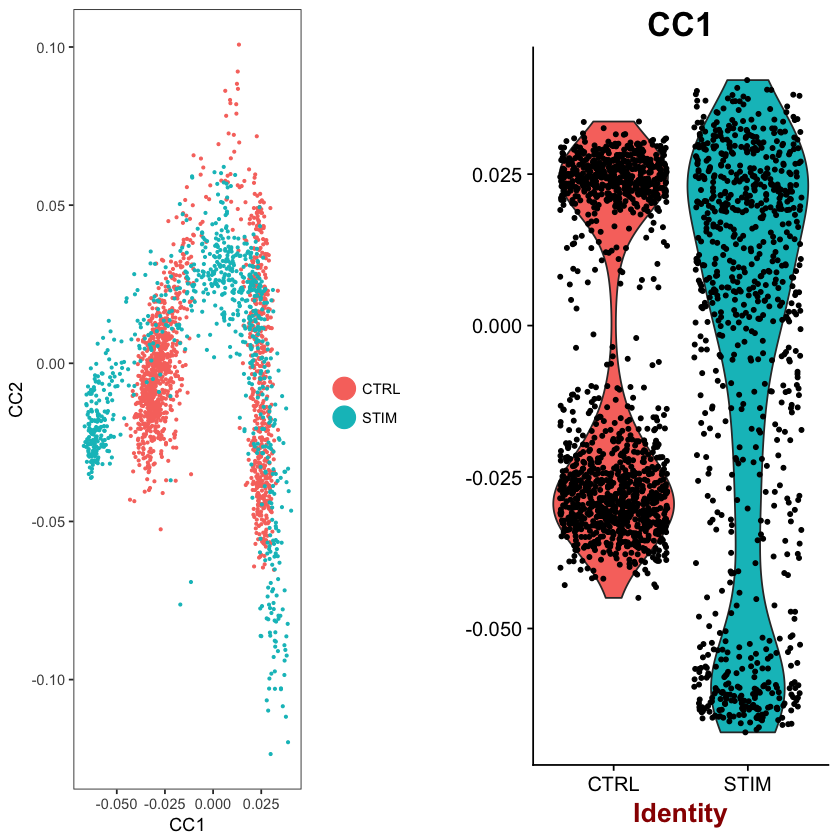

In [16]:
# visualize results of CCA plot CC1 versus CC2 and look at a violin plot
p1 <- DimPlot(object = immune.combined, reduction.use = "cca", group.by = "stim", 
    pt.size = 0.5, do.return = TRUE)
p2 <- VlnPlot(object = immune.combined, features.plot = "CC1", group.by = "stim", 
    do.return = TRUE)
plot_grid(p1, p2)

In [17]:
PrintDim(object = immune.combined, reduction.type = "cca", dims.print = 1:2, 
    genes.print = 10)

[1] "CC1"
 [1] "ENSMUSG00000027562" "ENSMUSG00000040466" "ENSMUSG00000054191"
 [4] "ENSMUSG00000027556" "ENSMUSG00000004655" "ENSMUSG00000028644"
 [7] "ENSMUSG00000061878" "ENSMUSG00000004552" "ENSMUSG00000028825"
[10] "ENSMUSG00000041329"
[1] ""
 [1] "ENSMUSG00000030707" "ENSMUSG00000017493" "ENSMUSG00000030220"
 [4] "ENSMUSG00000021728" "ENSMUSG00000021998" "ENSMUSG00000049775"
 [7] "ENSMUSG00000034353" "ENSMUSG00000026728" "ENSMUSG00000028581"
[10] "ENSMUSG00000040699"
[1] ""
[1] ""
[1] "CC2"
 [1] "ENSMUSG00000020125" "ENSMUSG00000022584" "ENSMUSG00000024681"
 [4] "ENSMUSG00000031722" "ENSMUSG00000035004" "ENSMUSG00000059498"
 [7] "ENSMUSG00000041754" "ENSMUSG00000040314" "ENSMUSG00000032786"
[10] "ENSMUSG00000001739"
[1] ""
 [1] "ENSMUSG00000020732" "ENSMUSG00000002985" "ENSMUSG00000041959"
 [4] "ENSMUSG00000044258" "ENSMUSG00000023828" "ENSMUSG00000015053"
 [7] "ENSMUSG00000006360" "ENSMUSG00000022824" "ENSMUSG00000022309"
[10] "ENSMUSG00000048376"
[1] ""
[1] ""


`geom_smooth()` using method = 'loess'


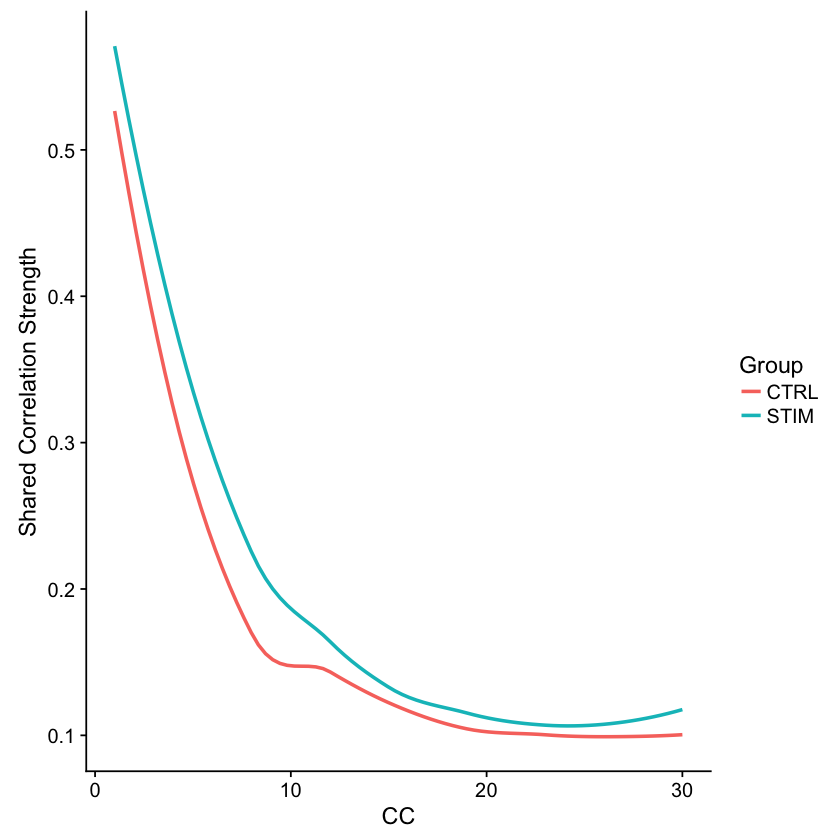

In [18]:
p3 <- MetageneBicorPlot(immune.combined, grouping.var = "stim", dims.eval = 1:30, 
    display.progress = FALSE)

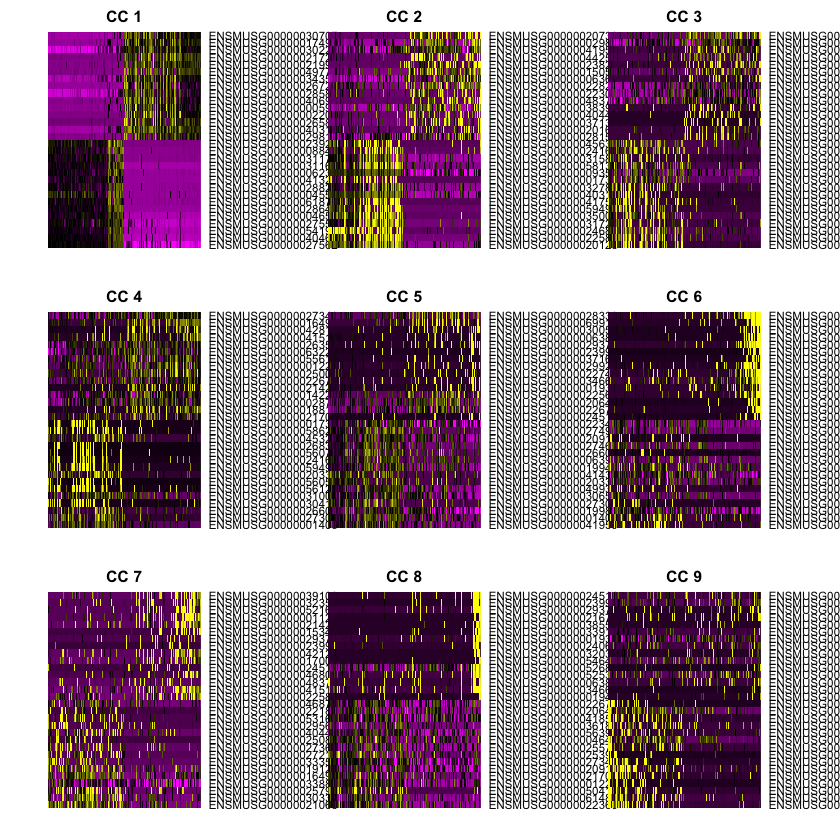

In [19]:
DimHeatmap(object = immune.combined, reduction.type = "cca", cells.use = 500, 
    dim.use = 1:9, do.balanced = TRUE)

In [20]:
immune.combined <- AlignSubspace(immune.combined, reduction.type = "cca", grouping.var = "stim", 
    dims.align = 1:20)

[1] "Scaling data matrix"
  |======================================================================| 100%
[1] "Scaling data matrix"
  |======================================================================| 100%


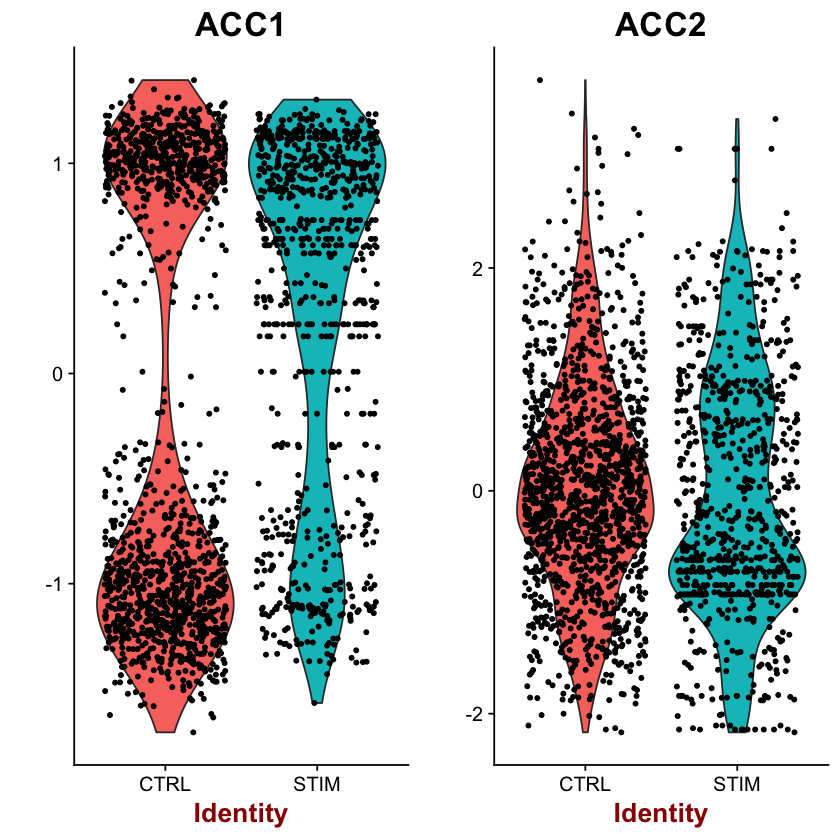

In [21]:
p1 <- VlnPlot(object = immune.combined, features.plot = "ACC1", group.by = "stim", 
    do.return = TRUE)
p2 <- VlnPlot(object = immune.combined, features.plot = "ACC2", group.by = "stim", 
    do.return = TRUE)
plot_grid(p1, p2)

In [22]:
# t-SNE and Clustering
immune.combined <- RunTSNE(immune.combined, reduction.use = "cca.aligned", dims.use = 1:20, 
    do.fast = T)
immune.combined <- FindClusters(immune.combined, reduction.type = "cca.aligned", 
    resolution = 0.6, dims.use = 1:20)

[1] "Constructing SNN"
  |======================================================================| 100%


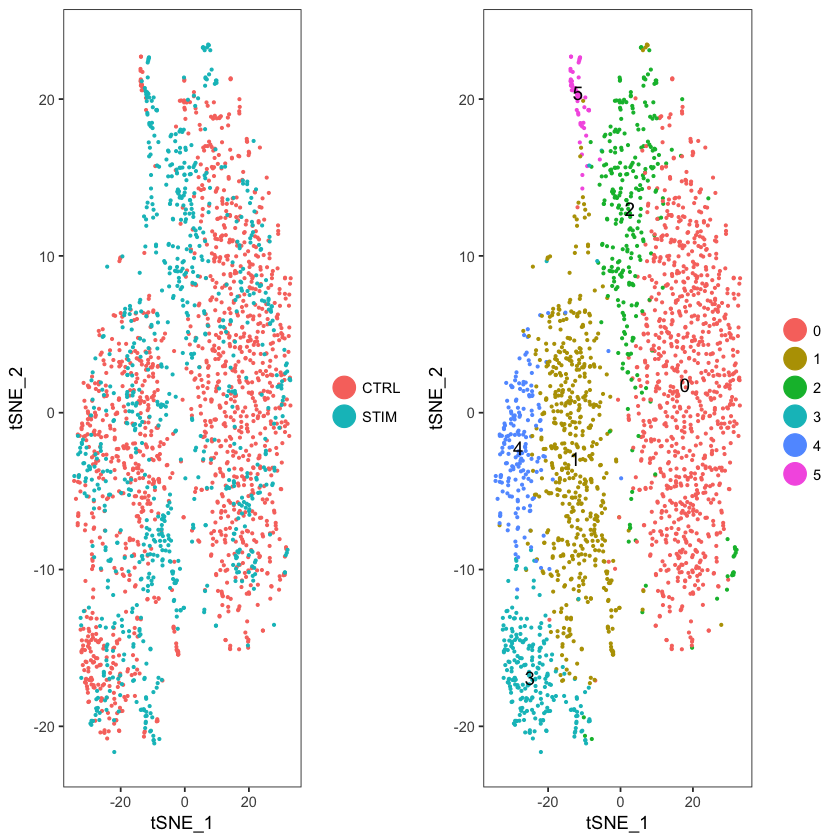

In [23]:
# Visualization
p1 <- TSNEPlot(immune.combined, do.return = T, pt.size = 0.5, group.by = "stim")
p2 <- TSNEPlot(immune.combined, do.label = T, do.return = T, pt.size = 0.5)
plot_grid(p1, p2)